In [47]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print('Train shape: {0}, test shape: {1}'.format(train_data.shape, test_data.shape))

Train shape: (42000, 785), test shape: (28000, 784)


In [3]:
labels, data = train_data['label'].values, train_data.iloc[:, 1:].values

In [4]:
print(data.shape)
print(np.min(data), np.max(data))

(42000, 784)
0 255


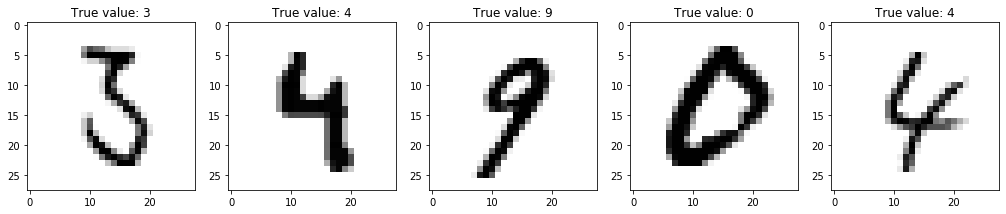

In [5]:
# Check a few digits

sample_digits = np.random.randint(0, len(data), 5)

fig = plt.figure(figsize=(15, 8))
plt.subplots_adjust(0.)
i = 1
for x in sample_digits:
    ax = fig.add_subplot(1, 5, i)
    i += 1
    ax.set_title('True value: {0}'.format(labels[x]))
    digit = data[x].reshape(28, 28)
    plt.imshow(digit, cmap = plt.cm.binary)

In [6]:
# Scale train and test data from 1 to 0
test = test_data.values

if np.max(data) > 1: data = data / 255
if np.max(test) > 1: test = test / 255
    
# Convert labels to categorical
y = np_utils.to_categorical(labels)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=46)

### Build  MLP models

In [8]:
num_inputs = X_train.shape[1]
num_outputs = y.shape[1]

In [16]:
# MLP model 2 hidden layers
first_mlp_model = Sequential([
    Dense(512, input_dim=num_inputs, activation='relu'),
    Dense(256, activation='relu'),
    Dense(num_outputs, activation='softmax')
])

first_mlp_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
first_mlp_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [18]:
first_mlp_model.fit(X_train, y_train,
         batch_size=256,
         epochs=12,
         verbose=2,
         validation_data=(X_test, y_test))

Train on 33600 samples, validate on 8400 samples
Epoch 1/12
 - 4s - loss: 0.0158 - accuracy: 0.9947 - val_loss: 0.1095 - val_accuracy: 0.9755
Epoch 2/12
 - 4s - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.1039 - val_accuracy: 0.9764
Epoch 3/12
 - 4s - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.1027 - val_accuracy: 0.9793
Epoch 4/12
 - 4s - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.1065 - val_accuracy: 0.9782
Epoch 5/12
 - 5s - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0984 - val_accuracy: 0.9808
Epoch 6/12
 - 5s - loss: 3.1465e-04 - accuracy: 1.0000 - val_loss: 0.1011 - val_accuracy: 0.9811
Epoch 7/12
 - 5s - loss: 1.5549e-04 - accuracy: 1.0000 - val_loss: 0.1021 - val_accuracy: 0.9810
Epoch 8/12
 - 5s - loss: 1.2341e-04 - accuracy: 1.0000 - val_loss: 0.1040 - val_accuracy: 0.9811
Epoch 9/12
 - 5s - loss: 1.0491e-04 - accuracy: 1.0000 - val_loss: 0.1060 - val_accuracy: 0.9808
Epoch 10/12
 - 5s - loss: 9.2128e-05 - accuracy: 1.0000 - val_loss: 0.1071 - val_accuracy: 0.9808


In [36]:
# MLP model 3 hidden layers and dropouts
second_mlp_model = Sequential([
    Dense(1024, input_dim=num_inputs, activation='relu'),
    Dropout(0.5),
    
    Dense(512, activation='relu'),
    Dropout(0.2),
    
    Dense(256, activation='relu'),
    Dropout(0.2),
    
    Dense(num_outputs, activation='softmax')
])

second_mlp_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
second_mlp_model.fit(X_train, y_train,
         batch_size=256,
         epochs=12,
         verbose=2,
         validation_data=(X_test, y_test))

Train on 33600 samples, validate on 8400 samples
Epoch 1/12
 - 23s - loss: 0.4522 - accuracy: 0.8607 - val_loss: 0.1551 - val_accuracy: 0.9533
Epoch 2/12
 - 15s - loss: 0.1743 - accuracy: 0.9460 - val_loss: 0.1116 - val_accuracy: 0.9664
Epoch 3/12
 - 15s - loss: 0.1268 - accuracy: 0.9603 - val_loss: 0.0937 - val_accuracy: 0.9714
Epoch 4/12
 - 15s - loss: 0.1044 - accuracy: 0.9676 - val_loss: 0.0816 - val_accuracy: 0.9758
Epoch 5/12
 - 15s - loss: 0.0871 - accuracy: 0.9719 - val_loss: 0.0831 - val_accuracy: 0.9750
Epoch 6/12
 - 14s - loss: 0.0745 - accuracy: 0.9754 - val_loss: 0.0823 - val_accuracy: 0.9771
Epoch 7/12
 - 14s - loss: 0.0676 - accuracy: 0.9783 - val_loss: 0.0796 - val_accuracy: 0.9771
Epoch 8/12
 - 14s - loss: 0.0583 - accuracy: 0.9806 - val_loss: 0.0791 - val_accuracy: 0.9769
Epoch 9/12
 - 14s - loss: 0.0578 - accuracy: 0.9815 - val_loss: 0.0835 - val_accuracy: 0.9783
Epoch 10/12
 - 14s - loss: 0.0497 - accuracy: 0.9835 - val_loss: 0.0777 - val_accuracy: 0.9798
Epoch 11/1

In [38]:
score = second_mlp_model.evaluate(X_test, y_test)
print('Loss: {0}, Accuracy: {1}'.format(score[0], score[1]))

8400/8400 [==============================] - 2s 235us/step
Loss: 0.07485243178066975, Accuracy: 0.981071412563324


### Build CNN models

In [9]:
# Resize X and y for CNN
X_train_resized = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_resized = X_test.reshape(X_test.shape[0], 28, 28, 1)

input_shape = X_train_resized.shape[1:]


In [17]:
print('Test shape: {0}, train shape: {1}'.format(X_train_resized.shape, X_test_resized.shape))

Test shape: (33600, 28, 28, 1), train shape: (8400, 28, 28, 1)


### Model 1

In [25]:
# Two conv layers
simple_cnn = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.3),
    
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.3),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.3),
    
    Dense(num_outputs, activation='softmax')
])

simple_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
simple_cnn.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)             

In [48]:
simple_cnn.fit(X_train_resized, y_train,
              batch_size=256,
              epochs=15,
              verbose=2,
              validation_data=(X_test_resized, y_test))

Train on 33600 samples, validate on 8400 samples
Epoch 1/15
 - 70s - loss: 0.0081 - accuracy: 0.9975 - val_loss: 0.0258 - val_accuracy: 0.9940
Epoch 2/15
 - 52s - loss: 0.0068 - accuracy: 0.9977 - val_loss: 0.0253 - val_accuracy: 0.9943
Epoch 3/15
 - 55s - loss: 0.0059 - accuracy: 0.9978 - val_loss: 0.0264 - val_accuracy: 0.9938
Epoch 4/15
 - 55s - loss: 0.0062 - accuracy: 0.9978 - val_loss: 0.0268 - val_accuracy: 0.9939
Epoch 5/15
 - 55s - loss: 0.0057 - accuracy: 0.9981 - val_loss: 0.0288 - val_accuracy: 0.9942
Epoch 6/15
 - 54s - loss: 0.0057 - accuracy: 0.9980 - val_loss: 0.0277 - val_accuracy: 0.9940
Epoch 7/15
 - 54s - loss: 0.0054 - accuracy: 0.9980 - val_loss: 0.0271 - val_accuracy: 0.9937
Epoch 8/15
 - 52s - loss: 0.0064 - accuracy: 0.9978 - val_loss: 0.0304 - val_accuracy: 0.9938
Epoch 9/15
 - 55s - loss: 0.0058 - accuracy: 0.9979 - val_loss: 0.0325 - val_accuracy: 0.9935
Epoch 10/15
 - 60s - loss: 0.0051 - accuracy: 0.9982 - val_loss: 0.0293 - val_accuracy: 0.9939
Epoch 11/1

### Model 2

In [49]:
# Three conv layers
three_conv = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.3),
    
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.3),
    
    Conv2D(128, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.3),
    
    Flatten(),
    
    Dense(1024, activation='relu'),
    Dropout(0.3),
    
    Dense(num_outputs, activation='softmax')
])

three_conv.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
three_conv.summary()

three_conv.fit(X_train_resized, y_train,
              batch_size=256,
              epochs=15,
              verbose=2,
              validation_data=(X_test_resized, y_test))


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 3, 3, 128)        

### Model 3

In [50]:
# Two double conv layers
doubled_cnn = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation='relu'),
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.5),
    
    Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.3),
    
    Flatten(),
    
    Dense(1024, activation='relu'),
    Dropout(0.3),
    
    Dense(num_outputs, activation='softmax')
])

doubled_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
doubled_cnn.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)         

In [51]:
doubled_cnn.fit(X_train_resized, y_train,
              batch_size=256,
              epochs=20,
              verbose=2,
              validation_data=(X_test_resized, y_test))

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
 - 91s - loss: 0.4221 - accuracy: 0.8636 - val_loss: 0.0872 - val_accuracy: 0.9724
Epoch 2/20
 - 73s - loss: 0.0972 - accuracy: 0.9700 - val_loss: 0.0614 - val_accuracy: 0.9811
Epoch 3/20
 - 72s - loss: 0.0653 - accuracy: 0.9797 - val_loss: 0.0449 - val_accuracy: 0.9869
Epoch 4/20
 - 72s - loss: 0.0505 - accuracy: 0.9835 - val_loss: 0.0445 - val_accuracy: 0.9874
Epoch 5/20
 - 73s - loss: 0.0440 - accuracy: 0.9858 - val_loss: 0.0437 - val_accuracy: 0.9860
Epoch 6/20
 - 74s - loss: 0.0359 - accuracy: 0.9883 - val_loss: 0.0378 - val_accuracy: 0.9902
Epoch 7/20
 - 72s - loss: 0.0316 - accuracy: 0.9898 - val_loss: 0.0386 - val_accuracy: 0.9885
Epoch 8/20
 - 72s - loss: 0.0320 - accuracy: 0.9893 - val_loss: 0.0322 - val_accuracy: 0.9901
Epoch 9/20
 - 72s - loss: 0.0260 - accuracy: 0.9920 - val_loss: 0.0296 - val_accuracy: 0.9907
Epoch 10/20
 - 73s - loss: 0.0240 - accuracy: 0.9921 - val_loss: 0.0339 - val_accuracy: 0.9911
Epoch 11/2

### Model 4

In [52]:
# Two triple conv layers
triple_cnn = Sequential([
    
    Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation='relu'),
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.5),
    
    Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.3),
    
    Flatten(),
    
    Dense(1024, activation='relu'),
    Dropout(0.3),
    
    Dense(num_outputs, activation='softmax')
])

triple_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
triple_cnn.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 9, 9, 64)         

In [53]:
triple_cnn.fit(X_train_resized, y_train,
              batch_size=256,
              epochs=15,
              verbose=2,
              validation_data=(X_test_resized, y_test))

Train on 33600 samples, validate on 8400 samples
Epoch 1/15
 - 133s - loss: 0.4748 - accuracy: 0.8440 - val_loss: 0.1087 - val_accuracy: 0.9652
Epoch 2/15
 - 104s - loss: 0.1127 - accuracy: 0.9650 - val_loss: 0.0521 - val_accuracy: 0.9837
Epoch 3/15
 - 112s - loss: 0.0822 - accuracy: 0.9744 - val_loss: 0.0444 - val_accuracy: 0.9862
Epoch 4/15
 - 102s - loss: 0.0601 - accuracy: 0.9813 - val_loss: 0.0385 - val_accuracy: 0.9875
Epoch 5/15
 - 103s - loss: 0.0517 - accuracy: 0.9840 - val_loss: 0.0370 - val_accuracy: 0.9889
Epoch 6/15
 - 103s - loss: 0.0465 - accuracy: 0.9855 - val_loss: 0.0333 - val_accuracy: 0.9900
Epoch 7/15
 - 100s - loss: 0.0372 - accuracy: 0.9880 - val_loss: 0.0291 - val_accuracy: 0.9911
Epoch 8/15
 - 88s - loss: 0.0386 - accuracy: 0.9880 - val_loss: 0.0299 - val_accuracy: 0.9917
Epoch 9/15
 - 81s - loss: 0.0314 - accuracy: 0.9900 - val_loss: 0.0281 - val_accuracy: 0.9921
Epoch 10/15
 - 95s - loss: 0.0305 - accuracy: 0.9895 - val_loss: 0.0311 - val_accuracy: 0.9917
Epo

### Data augmentation

In [34]:
from scipy.ndimage import shift  

def shift_image(data, direction):
    new_data = []
    for image in data:
        image = shift(image.reshape(28, 28), direction).flatten()
        new_data.append(image)
    
    return np.array(new_data)

In [35]:
X_aug = []
for direct in ([4, 0], [-4, 0], [0, 2], [0, -2], [3, 3], [-3, 3]):
    new_digits = shift_image(X_train, direct)
    X_aug.extend(new_digits)
    
X_aug = np.vstack((X_train, np.array(X_aug)))

In [36]:
y_aug = np.array(list(y_train) * 7)

In [37]:
X_aug_resized = X_aug.reshape(X_aug.shape[0], 28, 28, 1)

In [38]:
X_aug_resized.shape

(235200, 28, 28, 1)

In [29]:
callbacks = [ EarlyStopping(patience=5), 
             ModelCheckpoint('mnist_best_model.hdf5', save_best_only=True),
            ReduceLROnPlateau(patience=3)]

In [41]:
doubled_cnn.fit(X_aug_resized, y_aug,
              batch_size=256,
              epochs=15,
              verbose=1,
              callbacks=callbacks,
              validation_data=(X_test_resized, y_test))

Train on 235200 samples, validate on 8400 samples
Epoch 1/15
235200/235200 [==============================] - 617s 3ms/step - loss: 0.1977 - accuracy: 0.9354 - val_loss: 0.0333 - val_accuracy: 0.9905
Epoch 2/15
235200/235200 [==============================] - 577s 2ms/step - loss: 0.0508 - accuracy: 0.9841 - val_loss: 0.0303 - val_accuracy: 0.9906
Epoch 3/15
235200/235200 [==============================] - 580s 2ms/step - loss: 0.0361 - accuracy: 0.9887 - val_loss: 0.0244 - val_accuracy: 0.9923
Epoch 4/15
235200/235200 [==============================] - 567s 2ms/step - loss: 0.0295 - accuracy: 0.9909 - val_loss: 0.0226 - val_accuracy: 0.9929
Epoch 5/15
235200/235200 [==============================] - 536s 2ms/step - loss: 0.0259 - accuracy: 0.9918 - val_loss: 0.0221 - val_accuracy: 0.9939
Epoch 6/15
235200/235200 [==============================] - 496s 2ms/step - loss: 0.0224 - accuracy: 0.9929 - val_loss: 0.0194 - val_accuracy: 0.9943
Epoch 7/15
235200/235200 [========================

In [42]:
triple_cnn.fit(X_aug_resized, y_aug,
              batch_size=256,
              epochs=15,
              verbose=1,
              callbacks=callbacks,
              validation_data=(X_test_resized, y_test))

Train on 235200 samples, validate on 8400 samples
Epoch 1/15
235200/235200 [==============================] - 713s 3ms/step - loss: 0.0443 - accuracy: 0.9874 - val_loss: 0.0208 - val_accuracy: 0.9944
Epoch 2/15
235200/235200 [==============================] - 641s 3ms/step - loss: 0.0337 - accuracy: 0.9899 - val_loss: 0.0208 - val_accuracy: 0.9943
Epoch 3/15
235200/235200 [==============================] - 676s 3ms/step - loss: 0.0303 - accuracy: 0.9909 - val_loss: 0.0210 - val_accuracy: 0.9942
Epoch 4/15
235200/235200 [==============================] - 678s 3ms/step - loss: 0.0277 - accuracy: 0.9914 - val_loss: 0.0214 - val_accuracy: 0.9942
Epoch 5/15
235200/235200 [==============================] - 677s 3ms/step - loss: 0.0260 - accuracy: 0.9917 - val_loss: 0.0214 - val_accuracy: 0.9942
Epoch 6/15
235200/235200 [==============================] - 642s 3ms/step - loss: 0.0267 - accuracy: 0.9917 - val_loss: 0.0214 - val_accuracy: 0.9942
Epoch 7/15
235200/235200 [========================

In [245]:
cnn_score = doubled_cnn.evaluate(X_test_resized, y_test)
print('Loss: {0}, Accuracy: {1}'.format(cnn_score[0], cnn_score[1]))

8400/8400 [==============================] - 9s 1ms/step
Loss: 0.028446206388842776, Accuracy: 0.9936904907226562


In [44]:
# Prediction on test part and save results in csv
test = test.reshape(test.shape[0], 28, 28, 1)
y_pred = doubled_cnn.predict(test)

In [45]:
label_id = np.arange(1, test.shape[0]+1)

prediction = []
for i in range(len(label_id)):
    prediction.append(np.argmax(y_pred[i]))
    
submission = pd.DataFrame({'ImageId': label_id, 'Label': prediction})

In [46]:
submission.to_csv('predict_digits.csv', index=False)